In [45]:
import time
import gpiozero
import numpy as np

In [2]:

class Motor:
    def __init__(self, forward_pin, backward_pin, enable_pin):
        """
        Initialise the Motor object
        :param forward_pin: The forward pin number
        :param backward_pin: The backward pin number
        :param enable_pin: The enable pin number (ensure PWM)
        """
        self.forward_pin = gpiozero.OutputDevice(pin=forward_pin)
        self.backward_pin = gpiozero.OutputDevice(pin=backward_pin)
        self.enable_pwm = gpiozero.PWMOutputDevice(pin=enable_pin, active_high=True, initial_value=0, frequency=100)

    def stop(self):
        """
        Stops the motors
        """
        self.forward_pin.value = False
        self.backward_pin.value = False
        self.enable_pwm.value = 0

    def forward(self, speed):
        """
        Makes the motors move forward
        :param speed: A float between 0 and 1 representing the speed of the motor
        """
        self.forward_pin.value = True
        self.enable_pwm.value = speed

    def backward(self, speed):
        """
        Makes the motors move backward
        :param speed: A float between 0 and 1 representing the speed of the motor
        """
        self.forward_pin.value = True
        self.enable_pwm.value = speed

    def reverse(self):
        """
        Reverse the direction of the motor
        """
        self.forward_pin.value = not self.backward_pin.value
        self.backward_pin.value = not self.forward_pin.value

    def is_active(self):
        """
        Checks if the motor is active
        :return: A boolean representing if the motor is active
        """
        return self.enable_pwm.value > 0


In [3]:
motor_l = Motor(5,6,12)
motor_r = Motor(23,24,13)
encoder_l = gpiozero.RotaryEncoder(a=17, b=27,max_steps=100000) 
encoder_r = gpiozero.RotaryEncoder(a=20, b=21,max_steps=100000) 

In [46]:
X = np.array(list(range(1,11)))/10
encoder_l_arr = []
encoder_r_arr = []

for i in range(1,11):
    encoder_l.steps = 0
    encoder_r.steps = 0
    motor_l.forward(i/10)
    motor_r.forward(i/10)
    time.sleep(5)
    motor_l.stop()
    motor_r.stop()
    time.sleep(1)
    encoder_l_arr.append(encoder_l.steps)
    encoder_r_arr.append(encoder_r.steps)

1455
1692
3279
3744
4230
4745
4713
5259
5041
5522
5250
5713
5356
5797
5404
5926
5531
5957
5680
6050


Text(0, 0.5, 'Steps per 5s')

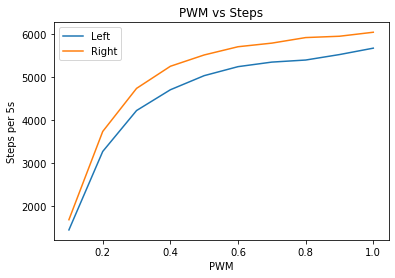

In [48]:
import matplotlib.pyplot as plt

plt.plot(X, encoder_l_arr)
plt.plot(X, encoder_r_arr)
plt.title('PWM vs Steps')
plt.legend(['Left','Right'])
plt.xlabel('PWM')
plt.ylabel('Steps per 5s')

In [49]:
trial_amount = 10
encoder_l_arr = []
encoder_r_arr = []
for i in range(trial_amount):
    encoder_l.steps = 0
    encoder_r.steps = 0
    motor_l.forward(1)
    motor_r.forward(1)
    time.sleep(5)
    motor_l.stop()
    motor_r.stop()
    time.sleep(1)
    encoder_l_arr.append(encoder_l.steps)
    encoder_r_arr.append(encoder_r.steps)
    

525.1600000000001
1627.2400000000002


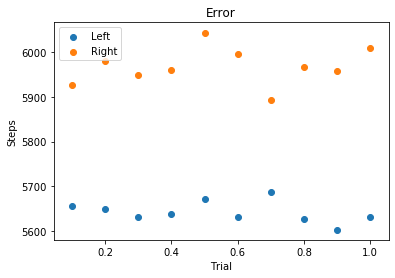

In [53]:
plt.scatter(X, encoder_l_arr)
plt.scatter(X, encoder_r_arr)
plt.title('Error')
plt.legend(['Left','Right'])
plt.xlabel('Trial')
plt.ylabel('Steps')
print(np.var(encoder_l_arr))
print(np.var(encoder_r_arr))

In [65]:
motor_l.forward(1)
motor_r.forward(1)
time.sleep(0.60)
motor_l.stop()
motor_r.stop()